<a href="https://colab.research.google.com/github/saraalbagory/ml-project/blob/main/alphabet_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sachinpatel21/az-handwritten-alphabets-in-csv-format")

print("Path to dataset files:", path)

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Menna\.cache\kagglehub\datasets\sachinpatel21\az-handwritten-alphabets-in-csv-format\versions\5


In [2]:
import pandas as pd

data = pd.read_csv(path + "/A_Z Handwritten Data.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


The ord function returns the Unicode (ASCII) code point of a character.


In [3]:
import numpy as np

#get the last column
numericLabels =data.iloc[:,0].unique()

# for i in numericLabels:
#   print(f"Label: {chr(i + ord('A'))}")
# print(numericLabels)
# convert the number to labels
uniqueLabels = np.array([chr(i + ord('A')) for i in numericLabels])
print(uniqueLabels)
len=numericLabels.size
print(f"the number of classes: {len}")

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
the number of classes: 26


show their distribution

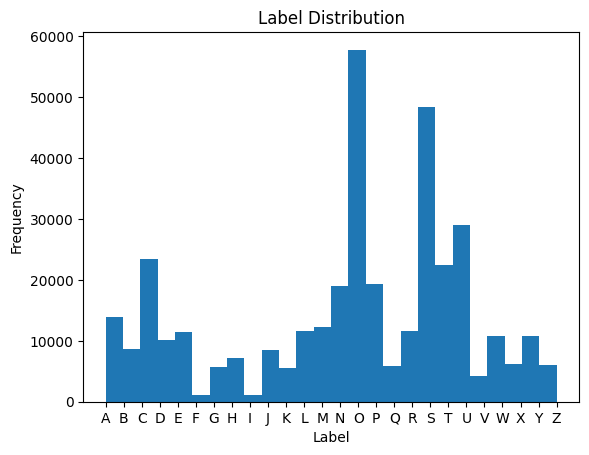

In [4]:
import matplotlib.pyplot as plt

numericLabels =data.iloc[:,0]
labels = np.array([chr(i + ord('A')) for i in numericLabels])
plt.hist(labels, bins=len)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


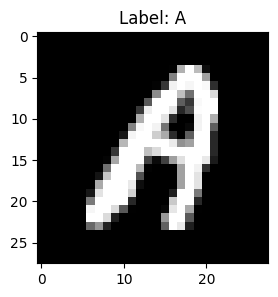

In [5]:
import matplotlib.pyplot as plt

data.info()
first_row = data.iloc[0]
label = first_row.iloc[0]
image_data = first_row.iloc[1:].values

# Reshape the pixel data to 28x28 matrix format
image = image_data.reshape((28, 28))

# Display the image
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {chr(label + ord('A'))}")  # Convert label number to letter
plt.show()

In [6]:
image_data=data.iloc[:,1:]
normalized_image_data=image_data/255
print(normalized_image_data)
normalized_image_data.describe()

        0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
372445  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372448  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.6

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,3.724500e+05,3.724500e+05
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000006,0.000006,0.000004,0.000004,0.000003,0.000002,0.000002,0.000003,9.370912e-07,4.211646e-08
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001925,0.002029,0.001652,0.001644,0.001512,0.001254,0.000819,0.001315,5.288302e-04,2.570312e-05
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988235,0.886275,0.898039,0.894118,0.921569,0.760784,0.403922,0.776471,3.215686e-01,1.568627e-02


In [7]:
# import tensorflow as tf
# normalized_features2=tf.keras.utils.normalize(features,axis=1)

Reshape the Flattened Vectors to Reconstruct and Display the Images

In [8]:
# reshaped_images = []
# for _, row in normalized_image_data.iterrows():  # Loop through each row
#     reshaped_image = row.values.reshape(28, 28)
#     reshaped_images.append(reshaped_image)
# reshaped_images = np.array(reshaped_images)
reshaped_images = normalized_image_data.values.reshape(-1, 28, 28)
# for i in range(10):
#   plt.figure(figsize=(1,1))
#   plt.imshow(reshaped_images[i], cmap='gray')
#   plt.title(f"label : {labels[i]}")
#   plt.show()

In [9]:
from sklearn.model_selection import train_test_split

numericLabels=data.iloc[:,0]
image_train, image_test, label_train, label_test=train_test_split(reshaped_images,numericLabels,test_size=0.2,random_state=42)
image_train_2d = image_train.reshape(image_train.shape[0], -1)
image_test_2d = image_test.reshape(image_test.shape[0], -1)

In [10]:
# from sklearn.svm import SVC

# model =SVC(C=1000,kernel='linear')
# model.fit(image_train_2d,label_train)

Split the training dataset into training and validation datasets

In [11]:
image_train, image_val, label_train, label_val = train_test_split(image_train, label_train, test_size=0.2, random_state=42)

In [12]:
from keras import utils as utils
#from tensorflow.keras.utils import to_categorical

label_train_onehot = utils.to_categorical(label_train, num_classes=26)
label_val_onehot = utils.to_categorical(label_val, num_classes=26)

reshape for cnn models

In [13]:
image_train_2d_tf = image_train.reshape(-1, 28, 28, 1)
image_val_2d_tf = image_val.reshape(-1, 28, 28, 1)
image_test_2d_tf = image_test.reshape(-1, 28, 28, 1)

MODEL 1

In [25]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

model1 = (keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
]))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
history1 = model1.fit(image_train_2d_tf, label_train_onehot, validation_data=(image_val_2d_tf, label_val_onehot), epochs=20,batch_size=512)

Epoch 1/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.7782 - loss: 0.8144 - val_accuracy: 0.9572 - val_loss: 0.1619
Epoch 2/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9627 - loss: 0.1405 - val_accuracy: 0.9686 - val_loss: 0.1132
Epoch 3/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9750 - loss: 0.0916 - val_accuracy: 0.9731 - val_loss: 0.0949
Epoch 4/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9802 - loss: 0.0740 - val_accuracy: 0.9800 - val_loss: 0.0752
Epoch 5/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9840 - loss: 0.0604 - val_accuracy: 0.9821 - val_loss: 0.0666
Epoch 6/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9863 - loss: 0.0510 - val_accuracy: 0.9812 - val_loss: 0.0689
Epoch 7/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9880 - loss: 0.0444 - val_accuracy: 0.9829 - val_loss: 0.0622
Epoch 8/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 39s 85ms/step - accuracy: 0.9901 - loss: 0.0367 - 

In [27]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,088,080 (7.97 MB)

 Trainable params: 696,026 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,392,054 (5.31 MB)

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


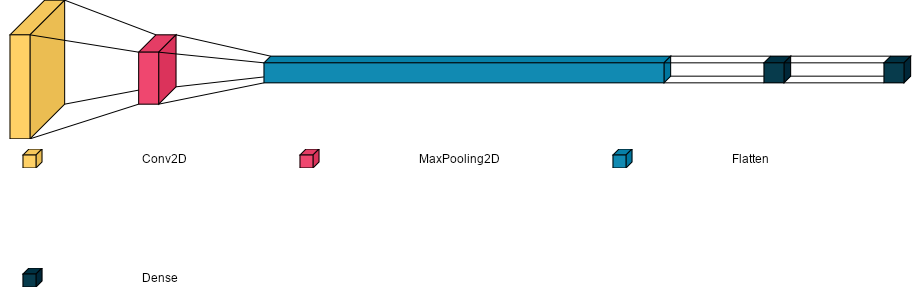

In [28]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model1, legend=True, font=font,spacing=100)

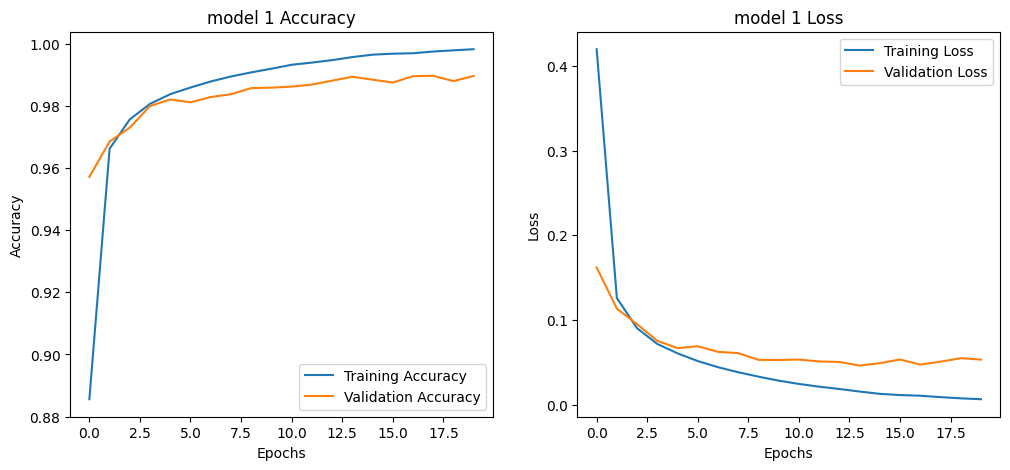

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL 2

In [30]:
keras.Sequential([])
model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(image_train_2d_tf, label_train_onehot, validation_data=(image_val_2d_tf, label_val_onehot), epochs=20,batch_size=512)


Epoch 1/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 60s 123ms/step - accuracy: 0.6889 - loss: 1.0961 - val_accuracy: 0.9444 - val_loss: 0.1914
Epoch 2/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 57s 123ms/step - accuracy: 0.9540 - loss: 0.1608 - val_accuracy: 0.9648 - val_loss: 0.1213
Epoch 3/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 56s 121ms/step - accuracy: 0.9679 - loss: 0.1104 - val_accuracy: 0.9710 - val_loss: 0.0979
Epoch 4/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - accuracy: 0.9744 - loss: 0.0883 - val_accuracy: 0.9751 - val_loss: 0.0866
Epoch 5/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 57s 123ms/step - accuracy: 0.9776 - loss: 0.0761 - val_accuracy: 0.9771 - val_loss: 0.0767
Epoch 6/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - accuracy: 0.9805 - loss: 0.0663 - val_accuracy: 0.9790 - val_loss: 0.0728
Epoch 7/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - accuracy: 0.9823 - loss: 0.0580 - val_accuracy: 0.9782 - val_loss: 0.0734
Epoch 8/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - accuracy: 0.9838 - loss: 0

In [31]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,136 (1.51 MB)

 Trainable params: 132,378 (517.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264,758 (1.01 MB)

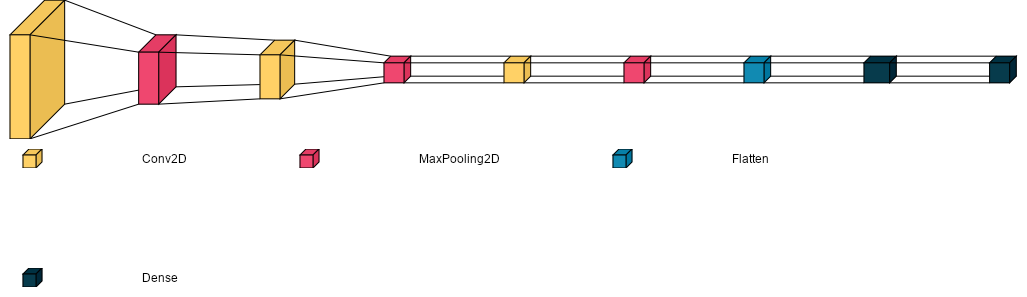

In [32]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model2, legend=True, font=font,spacing=100)

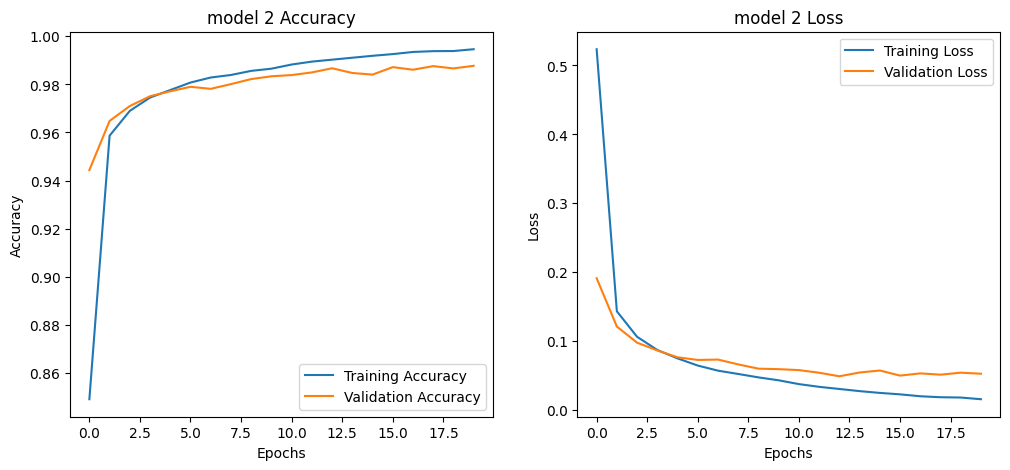

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()